<a href="https://colab.research.google.com/github/kkmax-develop/FruitDiscrimination/blob/master/Sample_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install keras

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.python.keras.preprocessing import image
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Input, Activation, add, Add, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential, Model

In [3]:
datagen = image.ImageDataGenerator(
            featurewise_center = False,
            samplewise_center = False,
            featurewise_std_normalization = False,
            samplewise_std_normalization = False,
            zca_whitening = False,
            rotation_range = 30,
            width_shift_range = 0.3,
            height_shift_range = 0.3,
            horizontal_flip = True,
            vertical_flip = False,
            validation_split = 0.1
        )

In [48]:
batch_size = 128
IMG_WIDTH = 100
IMG_HEIGHT = 100
CHANNELS = 3
train_dir = "/content/drive/My Drive/Colab Notebooks/FruitDiscrimination/data/training"
TARGET = ["Apple Golden 1","Avocado","Banana","Blueberry","Cherry 1","Grape Pink","Kaki",
         "Lemon","Mango","Onion Red","Peach","Strawberry","Tomato 1"]

train_generator = datagen.flow_from_directory(
            train_dir,
            target_size=(IMG_WIDTH,IMG_HEIGHT),
            batch_size=batch_size,
            class_mode='categorical',
            shuffle=True,
            classes=TARGET,
            subset = "training" 
        )

Found 5841 images belonging to 13 classes.


In [49]:
validation_generator = datagen.flow_from_directory(
            train_dir,
            target_size=(IMG_WIDTH,IMG_HEIGHT),
            batch_size=batch_size,
            class_mode='categorical',
            classes=TARGET,
            subset = "validation" 
        )

Found 646 images belonging to 13 classes.


In [50]:
# モデルの「容器」を作成
model = Sequential()

model.add(Conv2D(32,(3,3),activation="relu",input_shape=(IMG_WIDTH,IMG_HEIGHT,CHANNELS)))
model.add(MaxPooling2D((2,2)))
 
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
 
model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
 
model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2),padding="SAME"))
 
model.add(Flatten())
 
model.add(Dense(512,activation="relu"))
model.add(Dense(13,activation="sigmoid"))
 
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 21, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 8, 8, 128)        

In [51]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer = keras.optimizers.RMSprop(lr=1e-4, decay = 1e-6),
              metrics=['accuracy'])
 
STEP_SIZE_TRAIN=train_generator.n // train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n  // validation_generator.batch_size
epochs = 20
 
result = model.fit_generator(train_generator,
                             steps_per_epoch=STEP_SIZE_TRAIN,
                             epochs=epochs,
                             validation_data=validation_generator,
                             validation_steps=STEP_SIZE_VALID)

Epoch 1/20
45/45 [==============================] - 29s 648ms/step - loss: 2.6436 - accuracy: 0.0711 - val_loss: 2.5530 - val_accuracy: 0.0750
Epoch 2/20
45/45 [==============================] - 28s 626ms/step - loss: 2.5592 - accuracy: 0.0793 - val_loss: 2.5291 - val_accuracy: 0.0797
Epoch 3/20
45/45 [==============================] - 28s 626ms/step - loss: 2.4527 - accuracy: 0.1120 - val_loss: 2.2957 - val_accuracy: 0.1391
Epoch 4/20
45/45 [==============================] - 28s 621ms/step - loss: 2.3790 - accuracy: 0.1362 - val_loss: 2.1540 - val_accuracy: 0.1359
Epoch 5/20
45/45 [==============================] - 28s 623ms/step - loss: 2.1630 - accuracy: 0.1427 - val_loss: 2.1294 - val_accuracy: 0.0969
Epoch 6/20
45/45 [==============================] - 28s 621ms/step - loss: 1.9865 - accuracy: 0.1791 - val_loss: 1.7051 - val_accuracy: 0.1391
Epoch 7/20
45/45 [==============================] - 30s 659ms/step - loss: 1.7325 - accuracy: 0.2170 - val_loss: 1.5360 - val_accuracy: 0.1187

In [52]:
result.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

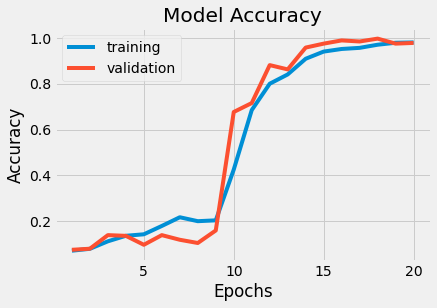

In [53]:
plt.style.use('fivethirtyeight')
plt.title('Model Accuracy')
plt.plot(range(1, epochs+1), result.history['accuracy'], label="training")
plt.plot(range(1, epochs+1), result.history['val_accuracy'], label="validation")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

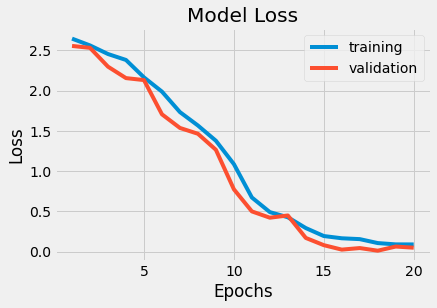

In [54]:
plt.style.use('fivethirtyeight')
plt.title('Model Loss')
plt.plot(range(1, epochs+1), result.history['loss'], label="training")
plt.plot(range(1, epochs+1), result.history['val_loss'], label="validation")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()